<a href="https://colab.research.google.com/github/anushkarai26/Metabolic_Health_Tracker/blob/main/metabolic_health_tracker_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### METABOLIC HEALTH TRACKER


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/metabolic_health_60_days.csv')

In [3]:
#View first 5 rows
print(df.head())

         Date  Weight_kg   BMI  Calories  Blood_Sugar_mg_dL  Water_Liters  \
0  2025-04-01       72.4  23.3      1922                110           1.7   
1  2025-04-02       71.9  23.4      2200                137           2.0   
2  2025-04-03       72.5  23.1      2093                109           2.0   
3  2025-04-04       73.2  23.0      2079                 97           1.7   
4  2025-04-05       71.8  23.8      1997                 96           2.1   

   Sleep_Hours  Steps  Mood (1-5)  Stress_Level (1-10)  Sugary_Drinks_ml  \
0          8.0   7365           1                    3                98   
1          6.4  10492           5                    5               384   
2          7.4   6698           4                    5               404   
3          7.6  11731           4                    3               495   
4          6.3   6395           4                    3               310   

   Active_Minutes  
0              66  
1              42  
2              33  


In [5]:
#View last five rows
print(df.tail())

          Date  Weight_kg   BMI  Calories  Blood_Sugar_mg_dL  Water_Liters  \
55  2025-05-26       72.7  23.6      2137                107           2.3   
56  2025-05-27       71.3  23.5      1962                114           2.6   
57  2025-05-28       71.8  23.0      1960                131           2.3   
58  2025-05-29       72.3  24.0      2379                120           1.5   
59  2025-05-30       72.8  23.8      2197                 92           1.9   

    Sleep_Hours  Steps  Mood (1-5)  Stress_Level (1-10)  Sugary_Drinks_ml  \
55          7.9   7856           4                    2               221   
56          7.7   7365           2                    6               250   
57          7.7   6499           4                    2               312   
58          8.0   7680           4                    3               400   
59          7.0   6510           5                    2               111   

    Active_Minutes  
55              65  
56              53  
57   

In [6]:
# Basic info
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 60 non-null     object 
 1   Weight_kg            60 non-null     float64
 2   BMI                  60 non-null     float64
 3   Calories             60 non-null     int64  
 4   Blood_Sugar_mg_dL    60 non-null     int64  
 5   Water_Liters         60 non-null     float64
 6   Sleep_Hours          60 non-null     float64
 7   Steps                60 non-null     int64  
 8   Mood (1-5)           60 non-null     int64  
 9   Stress_Level (1-10)  60 non-null     int64  
 10  Sugary_Drinks_ml     60 non-null     int64  
 11  Active_Minutes       60 non-null     int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 5.8+ KB
None


In [7]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Weight_kg        BMI     Calories  Blood_Sugar_mg_dL  Water_Liters  \
count  60.000000  60.000000    60.000000          60.000000     60.000000   
mean   71.881667  23.493333  2079.300000         117.283333      2.036667   
std     0.728475   0.379056   159.678204          13.451850      0.332411   
min    70.400000  22.500000  1801.000000          92.000000      1.400000   
25%    71.475000  23.300000  1946.750000         109.750000      1.800000   
50%    71.800000  23.500000  2057.500000         119.000000      2.000000   
75%    72.325000  23.625000  2205.750000         126.250000      2.200000   
max    73.500000  24.500000  2386.000000         138.000000      3.200000   

       Sleep_Hours         Steps  Mood (1-5)  Stress_Level (1-10)  \
count    60.000000     60.000000   60.000000            60.000000   
mean      7.041667   9028.366667    3.250000             4.550000   
std       0.776627   1728.060311    1.468598             1.960846   
min      

In [8]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date                   0
Weight_kg              0
BMI                    0
Calories               0
Blood_Sugar_mg_dL      0
Water_Liters           0
Sleep_Hours            0
Steps                  0
Mood (1-5)             0
Stress_Level (1-10)    0
Sugary_Drinks_ml       0
Active_Minutes         0
dtype: int64


In [16]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

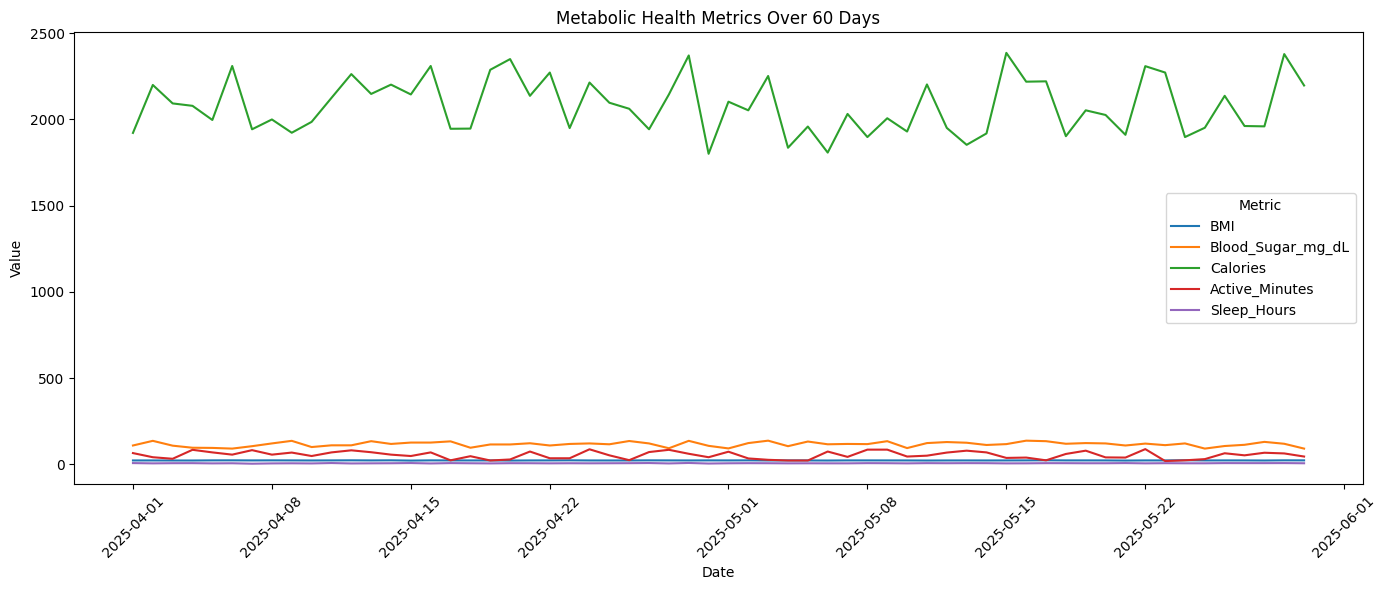

In [14]:
# Time series plot for key health metrics
df['Date'] = pd.to_datetime(df['Date'])

melted = df.melt(id_vars=["Date"],
                 value_vars=["BMI", "Blood_Sugar_mg_dL", "Calories", "Active_Minutes", "Sleep_Hours"],
                 var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 6))
sns.lineplot(data=melted, x="Date", y="Value", hue="Metric")
plt.title("Metabolic Health Metrics Over 60 Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

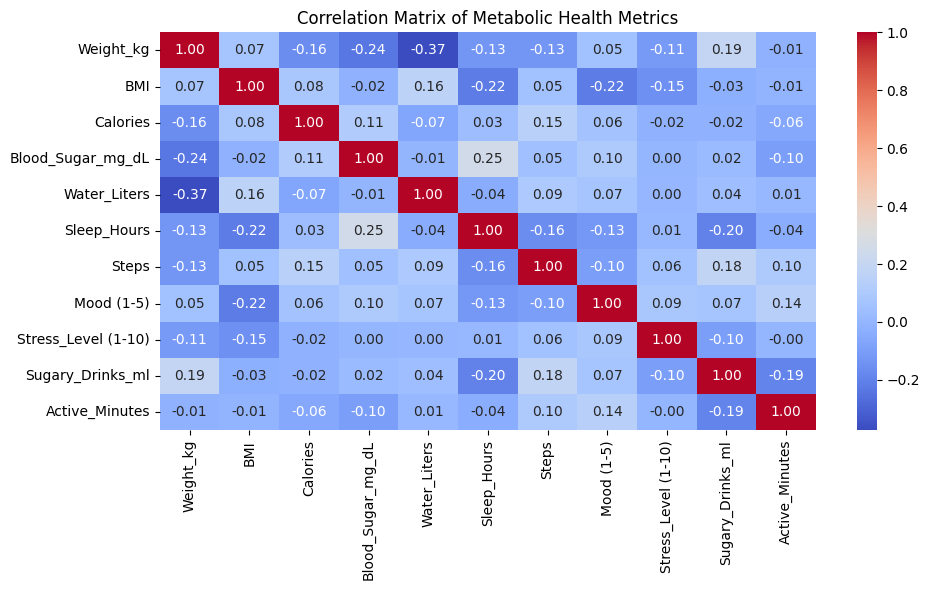

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Metabolic Health Metrics")
plt.tight_layout()
plt.show()